<a href="https://colab.research.google.com/github/epb378/FRET-simulator/blob/THURSAPRIL16TH/fretsimulator2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving green extinction coefficient.csv to green extinction coefficient.csv
Saving red extinction coefficient.csv to red extinction coefficient.csv
Saving blue extinction coefficient.csv to blue extinction coefficient.csv
Saving bluemolem.csv to bluemolem.csv
Saving greenmolem.csv to greenmolem.csv
Saving redmolem.csv to redmolem.csv


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([ 84., 147., 198., 346., 387., 513., 548., 661., 698., 552., 666.,
        572., 602., 507., 645., 551., 528., 568., 332., 329., 170., 138.,
         98.,  42.,  42.,  20.,  24.,  10.,   8.,   7.,   3.,   1.,   1.,
          0.,   2.]),
 array([350.        , 358.57142857, 367.14285714, 375.71428571,
        384.28571429, 392.85714286, 401.42857143, 410.        ,
        418.57142857, 427.14285714, 435.71428571, 444.28571429,
        452.85714286, 461.42857143, 470.        , 478.57142857,
        487.14285714, 495.71428571, 504.28571429, 512.85714286,
        521.42857143, 530.        , 538.57142857, 547.14285714,
        555.71428571, 564.28571429, 572.85714286, 581.42857143,
        590.        , 598.57142857, 607.14285714, 615.71428571,
        624.28571429, 632.85714286, 641.42857143, 650.        ]),
 <a list of 35 Patch objects>)

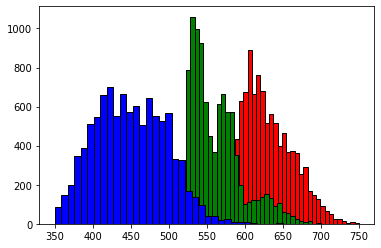

In [3]:
#importing data for emission coefficients
import scipy
import numpy as np
from scipy import stats
reddata=np.loadtxt('redmolem.csv',delimiter=',')
redwavelength=reddata[:,0]
greendata=np.loadtxt('greenmolem.csv',delimiter=',')
greenwavelength=greendata[:,0]
bluedata=np.loadtxt('bluemolem.csv',delimiter=',')
bluewavelength=bluedata[:,0]
redprob=reddata[:,1]
greenprob=greendata[:,1]
blueprob=bluedata[:,1]
redcustm = stats.rv_discrete(name='redcustm', values=(redwavelength, redprob))
greencustm = stats.rv_discrete(name='greencustm', values=(greenwavelength, greenprob))
bluecustm = stats.rv_discrete(name='bluecustm', values=(bluewavelength, blueprob))
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(redcustm.rvs(size=10000), color = 'red', edgecolor = 'black',
         bins = int((700-350)/10)) #plot randomly sampled wavelngths from emission distribution
plt.hist(greencustm.rvs(size=10000), color = 'green', edgecolor = 'black',
         bins = int((700-350)/10)) #plot randomly sampled wavelngths from emission distribution
plt.hist(bluecustm.rvs(size=10000), color = 'blue', edgecolor = 'black',
         bins = int((700-350)/10)) #plot randomly sampled wavelngths from emission distribution
#print(custm.rvs(size=100))

In [0]:
#take our array of molecules (reds greens blues) and put each one in a random position on a 1-10 xyz grid
def populategrid(molecules,Nr,Ng,Nb, Xmax, Ymax, Zmax):
  from random import randint

  Ntot=Ng+Nr+Nb
  
  for i in range (0,Ntot):
    
    molecules[i,1]=randint(1,Xmax)
    molecules[i,2]=randint(1,Ymax)
    molecules[i,3]=randint(1,Zmax)
    if i>0:
        for j in range(0,i):
            if molecules[i,1]==molecules[j,1] and molecules[i,2]==molecules[j,2] and molecules[i,3]==molecules[j,3]:
                i = i-1
  return molecules

In [0]:
#calculate distances between molecules
def distancescalc (molecules, Ntot):
  distances=np.zeros([Ntot,Ntot])
  for i in range (0,Ntot):
    for j in range(0,Ntot):
      distances[i,j]=np.sqrt((molecules[i,1]-molecules[j,1])**2 + (molecules[i,2]-molecules[j,2])**2 + (molecules[i,3]-molecules[j,3])**2)
  return distances

In [0]:
#calculate combined extinction coefficienct
moltomolecule=1 #ratio of molar extinction coefficient to molecular
redabs=np.loadtxt('red extinction coefficient.csv',delimiter=',')
greenabs=np.loadtxt('green extinction coefficient.csv',delimiter=',')
blueabs=np.loadtxt('blue extinction coefficient.csv',delimiter=',')

def combinedexctinction (redabs,greenabs,blueabs,Nr,Ng,Nb): 
  redwave=redabs[:,0]
  greenwave=greenabs[:,0]
  bluewave=blueabs[:,0]
  redexct=redabs[:,1]
  greenexct=greenabs[:,1]
  blueexct=blueabs[:,1]
  #the below is for 300-700 nm exctinction coefficiencts with a nm step of 1 - could try variable length later...
  combined=np.zeros([redwave.size,5])
  combined[:,0]=redwave
  combined[:,1]=Nb*blueexct*moltomolecule
  combined[:,2]=Ng*greenexct*moltomolecule
  combined[:,3]=Nr*redexct*moltomolecule
  combined[:,4]=combined[:,1]+combined[:,2]+combined[:,3]
  return combined
totalextinction=combinedexctinction(redabs,greenabs,blueabs,2,20,20)

In [81]:
#excite 1 random blue
def exciterandomblue (molecules,Nb, printing=False):
  findblues=np.where(molecules[:,0]==1) #excite random blue
  bluesarray=findblues[0]
  excitint=random.randint(0,Nb-1)
  excitindex=bluesarray[excitint]
  if printing==True:
    print("start molecule is number ")
    print( excitindex)
  molecules[:,4]=0
  molecules[excitindex,4]=1
  return molecules, excitindex
exciterandomblue(molecules,Nb)

(array([[ 1.,  2.,  3.,  6.,  0.],
        [ 2.,  7.,  3.,  9.,  0.],
        [ 1.,  9.,  7.,  8.,  0.],
        [ 1.,  1.,  1.,  3.,  0.],
        [ 2.,  7.,  7.,  7.,  0.],
        [ 1.,  5.,  6.,  8.,  0.],
        [ 1.,  5.,  9.,  8.,  0.],
        [ 1., 10., 10.,  4.,  0.],
        [ 1.,  7.,  5., 10.,  0.],
        [ 3.,  9.,  3.,  1.,  0.],
        [ 3.,  5.,  1.,  5.,  0.],
        [ 2.,  9.,  9.,  3.,  0.],
        [ 1.,  2.,  5.,  1.,  0.],
        [ 1.,  1.,  4.,  6.,  0.],
        [ 2.,  2.,  7.,  4.,  0.],
        [ 1., 10.,  7.,  1.,  0.],
        [ 1.,  1.,  6.,  6.,  0.],
        [ 2.,  2., 10.,  7.,  0.],
        [ 2.,  1., 10.,  5.,  0.],
        [ 1.,  1.,  5.,  8.,  0.],
        [ 1.,  1.,  4.,  2.,  1.],
        [ 2.,  7.,  5., 10.,  0.],
        [ 2.,  1., 10.,  2.,  0.],
        [ 1.,  9.,  9.,  6.,  0.],
        [ 2.,  2.,  1., 10.,  0.],
        [ 2.,  5., 10.,  1.,  0.],
        [ 1.,  2.,  3.,  5.,  0.],
        [ 1.,  6.,  7.,  9.,  0.],
        [ 1.,  5.,  

In [0]:
import matplotlib.pyplot as plt #plot combined extinction coefficient
plt.plot(totalextinction[:,0],totalextinction[:,1],'b',totalextinction[:,0],totalextinction[:,2],'g',totalextinction[:,0],totalextinction[:,3],'r',totalextinction[:,0],totalextinction[:,4],'s',)

In [0]:
def Fretting(distances,molecules,excitindex, zeroNtot,Ros,PLQEs,color,redcustm,greencustm,bluecustm, outspectrum):
  closest=1
  breakernumber=0
  while True:
    a=distances[:,excitindex] #find distances to closest molecules
    a.shape=(Ntot,1)
    indexeddistances= np.concatenate((zeroNtot,a), axis=1)
    indexeddistances= indexeddistances[indexeddistances[:,1].argsort()] #find index of closest molecule
    if molecules[int(indexeddistances[closest,0]),0] > molecules[excitindex,0]:
      dice=np.random.random()
      Pfret=1/(1+(indexeddistances[closest,1]/Ros[int(molecules[excitindex,0]-1),int(molecules[int(indexeddistances[closest,0]),0]-1)])**6) #fret probability
      Pem=Pfret + (1-Pfret)*PLQEs[int(molecules[excitindex,0]-1)]
      if dice<=Pfret:
        molecules[excitindex,4]=0
        molecules[int(indexeddistances[closest,0]),4]=1
        excitindex=int(indexeddistances[closest,0])
#                print("FRET")
      elif Pfret< dice <= Pem: #radiative emission
        if color==3:
          outspectrum[i]=redcustm.rvs()
                  #print(redcustm.rvs())
          breakernumber=1
          break
        elif color==2:
          outspectrum[i]=greencustm.rvs()
          #print(greencustm.rvs())
          breakernumber=1
          break
        else:
          outspectrum[i]=bluecustm.rvs()
          breakernumber=1
          break
        
        
      else:
      #print("non-radiative recombination, bozo")
        breakernumber=1
        break
    else:
      closest= closest+1 #try next closest - not sure about this
      if closest==Ntot: #don't overflow index
        breakernumber=1
        break

  return molecules, excitindex, breakernumber, outspectrum

PLQE=
0.22508


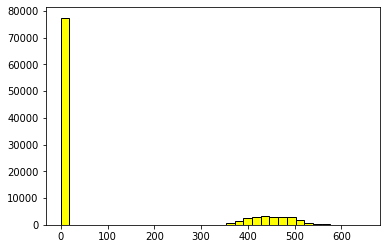

In [98]:
from mpl_toolkits.mplot3d import Axes3D #(3D scatter https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html)
import numpy as np
import matplotlib.pyplot as plt
import math
import random
#set up grid of Xmax*Ymax*Zmax points
Xmax, Ymax, Zmax = 10, 10, 10
Ros=np.array([[1,1,4],[0.01,1,4],[0.01,0.01,1]])
PLQEs=np.array([0.2,0.9,0.99])
#populate grid with Nb blue molecules, Ng greens, and Nr reds

gtb=1 #ratio of greens to blues
rtg=0.1 #ratio of reds to greens

Nb = 20 # number of blues
Ng = Nb*gtb #number of greens
Nr = math.floor(Ng*rtg) #number of reds
Ntot=Nb+Ng+Nr # total number of green molecules
blues=np.ones([Nb,1]) #1D array of blues
greens=np.ones([Ng,1]) #1D array of greens
greens=greens*2 #each green is identified by the number 2
reds=np.ones([Nr,1]) #1D array of reds
reds=reds*3  #each red is identified by the number 3

molecules=np.concatenate((reds,greens,blues)) #concatenate blues, greens, reds (1,1,...,1,2,2,...,2,3,3,...,3)
np.random.shuffle(molecules) #(mix them up in some way)
rest=np.zeros([Ntot,4]) #give each molecule an x y z dimension. the fourth is for indicating if it is excited or not
molecules=np.concatenate((molecules,rest), axis=1)

molecules=populategrid(molecules,Nr,Ng,Nb, Xmax, Ymax, Zmax) #put each molecule in a grid (no molecular size here)
distances = distancescalc(molecules,Ntot) #calculate distances between each molecule here

ticks=100000
outspectrum=np.zeros([ticks]) #output emission spectrum

molecules, excitindex=exciterandomblue (molecules,Nb) #excite one random blue molecule

zeroNtot=np.arange(Ntot) #0 - Ntot to find index of closest molecule to excited molecule (couldn't find an easier way)
zeroNtot.shape=(Ntot,1)

for i in range (0,ticks):
    molecules, excitindex=exciterandomblue (molecules,Nb)
    color=molecules[excitindex,0]
    somethinghappened=0
    #molecules2 is dummy array which is thrown away
    molecules2, excitindex, breakernumber, outspectrum = Fretting(distances,molecules,excitindex,zeroNtot,Ros,PLQEs,color,redcustm,greencustm,bluecustm, outspectrum)
   # if breakernumber==1:
      #break
plt.hist(outspectrum, color = 'yellow', edgecolor = 'black',
         bins = int((700-350)/10)) 
outnonzero=np.count_nonzero(outspectrum)
outPLQE=outnonzero/(i+1)
#print("end molecule is number ")
#print( excitindex)
print('PLQE=')
print(outPLQE)

(array([12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  9., 31., 15., 16.,  3.,  8.,  1.,  5.]),
 array([  0.        ,  18.91428571,  37.82857143,  56.74285714,
         75.65714286,  94.57142857, 113.48571429, 132.4       ,
        151.31428571, 170.22857143, 189.14285714, 208.05714286,
        226.97142857, 245.88571429, 264.8       , 283.71428571,
        302.62857143, 321.54285714, 340.45714286, 359.37142857,
        378.28571429, 397.2       , 416.11428571, 435.02857143,
        453.94285714, 472.85714286, 491.77142857, 510.68571429,
        529.6       , 548.51428571, 567.42857143, 586.34285714,
        605.25714286, 624.17142857, 643.08571429, 662.        ]),
 <a list of 35 Patch objects>)

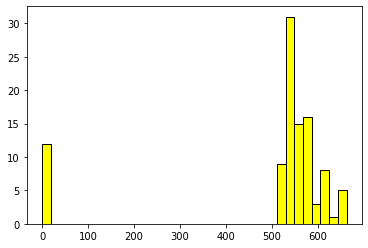